# Testing with a dataset 

We compare different model on the dataset of wikiann that contains tags `['PER', 'ORG', 'LOC']`
We get teh score by comparing the output at the entity level and not at the token level.

In [1]:
import pickle
from collections import defaultdict
from ner.process_results import get_metrics, get_metrics_all, show_cm, show_cm_multi, get_metrics_all_extended, show_cm_multi_extended
from ner.classical_models.ner_models import get_results
from ner.Datasets.Conll2003Dataset import Conll2003Dataset
from ner.Datasets.OntoNotes5Dataset import OntoNote5Dataset
from ner.Datasets.MyDataset import MyDataset

from ner.utils import *

import os
import pandas as pd

%load_ext autoreload
%autoreload 2

# dataset = MyDataset.my_load_dataset(dataset=Conll2003Dataset, split = 'test', cleaned= True)

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Getting results with Ontonote dataset

In [ ]:
train, test = OntoNote5Dataset.my_load_dataset()

100%|██████████| 1403/1403 [19:00<00:00,  1.23it/s]


['CARDINAL', 'ORDINAL', 'WORK_OF_ART', 'PERSON', 'LOC', 'DATE', 'PERCENT', 'PRODUCT', 'MONEY', 'FAC', 'TIME', 'ORG', 'QUANTITY', 'LANGUAGE', 'GPE', 'LAW', 'NORP', 'EVENT']
results : [[('Friday', 'DATE'), ('U.S.', 'GPE'), ('non-U.S.', 'GPE'), ('Dow Jones Capital Markets Report', 'ORG')], [('Oct. 15 , 1999', 'DATE'), ('50', 'CARDINAL'), ('Treasury', 'ORG'), ('10 - year', 'DATE')], [("Moody 's Investors Service Inc.", 'ORG'), ("Standard & Poor 's Corp.", 'ORG'), ('Merrill Lynch Capital Markets', 'ORG')], [('102', 'CARDINAL'), ('Freddie Mac', 'ORG'), ('8 1/2 %', 'PERCENT'), ('28.4 years', 'DATE'), ('afternoon', 'TIME')], [('8.78 %', 'PERCENT'), ('75', 'CARDINAL'), ('two - year', 'DATE'), ('Treasury', 'ORG'), ('10.05 %', 'PERCENT'), ('200', 'CARDINAL'), ('10 - year', 'DATE')], [('first', 'ORDINAL'), ('Freddie Mac', 'ORG'), ('8 %', 'PERCENT'), ('Giant', 'ORG')], [('Freddie Mac', 'ORG'), ('58 1/4', 'CARDINAL'), ('8.45 %', 'PERCENT'), ('eight years', 'DATE'), ('160 %', 'PERCENT'), ('PSA', 'ORG

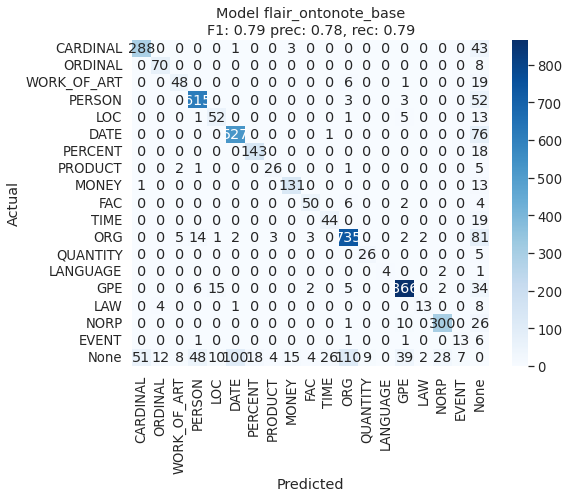

{'flair_ontonote_base': 0.7857409674035589}

In [ ]:
results, f1s= get_results(test, with_save= True)
f1s

# Others

In [ ]:
file_name = results_files[10]
file_path = folder_path + file_name
with open(file_path, 'rb') as f:
    results_llama[file_name]= pickle.load(f) 
print(results_llama[file_name].keys()) 
results_llama[file_name]['true_labels'] = dataset_llama['spans']
cm = {}
f1 = {}
precision = {}
recall = {}
y_true, y_pred, all_nes= {},{}, {}
for model in results_llama[file_name] : 
    if model != "true_labels" :
        cm[model],f1[model], precision[model], recall[model], y_true[model], y_pred[model], all_nes[model]= get_metrics_all(results_llama[file_name][model], results_llama[file_name]['true_labels'])
        show_cm_multi(cm[model],f1[model], precision[model], recall[model], model)
print(f"{file_name} {f1}")

In [ ]:
f1s

In [ ]:
from ner.Llama2_NER import Llama2_NER_FewShots_Entity
few_shots_ner = Llama2_NER_FewShots_Entity(dataset_train, "", Utils())

few_shots_ner.get_prompts("Washington is the capital of the Unisted States", tags = ["PER", "ORG", "LOC"])

In [ ]:
from ner.Llama2_NER import Llama2_NER_FewShots_Random
import pickle
llama = Llama2_NER_FewShots_Random("","","")
tags = ["PER", "LOC", "ORG", "MISC"]
results = {}
for model in ['7b', '13b']:
    for nb_samp in [500,1000,1500]:
        with open(f"./ner/saves/results/results_pred_labels_colnn2003_ft_{model}_{nb_samp}_50.pkl", 'rb') as f :
            mod = f"{model}_{nb_samp}"
            results[mod] = pickle.load(f)
results['true_labels'] = dataset_llama['spans']


In [ ]:

cm = {}
f1 = {}
precision = {}
recall = {}
y_true, y_pred, all_nes= {},{}, {}
res = results
for model in res: 
    if model != "true_labels" :
        cm[model],f1[model], precision[model], recall[model], y_true[model], y_pred[model], all_nes[model]= get_metrics_all(res[model], res['true_labels'])
        # show_cm(cm[model], [{tag : f"{f1s[model][tag]:.2f}" } for tag in ["general"] + tag_type], model)
        show_cm_multi(cm[model],f1[model], precision[model], recall[model], model)


In [ ]:
cm = {}
f1 = {}
precision = {}
recall = {}
y_true, y_pred, all_nes= {},{}, {}
res = results
for model in res : 
    if model in ['spacy', 'refined'] :
        cm[model],f1[model], precision[model], recall[model], y_true[model], y_pred[model], all_nes[model]= get_metrics_all_extended(res[model], res['true_labels'])
        # show_cm(cm[model], [{tag : f"{f1s[model][tag]:.2f}" } for tag in ["general"] + tag_type], model)
        show_cm_multi_extended(cm[model],f1[model], precision[model], recall[model], model)

In [ ]:
import pandas as pd 
key ="entity"
resu = pd.DataFrame({"gold" : y_true[key], "pred" : y_pred[key], 'named_entity' : all_nes[key]})
resu[resu['gold'] != resu['pred']]

In [ ]:
dfs = {}
for key in results :
    flattened = [item for sublist in results[key] for item in sublist]
    dfs[key] = pd.DataFrame([{'entity' : ne[0], 'tag' : ne[1], 'ref_tag' : ne[2] if len(ne)>2 else ""} for ne in flattened])
    dfs[key] = dfs[key].groupby('entity').agg(set)
dfs['true_labels'].rename(columns={'tag': 'gold_tags'}, inplace=True)
del dfs['true_labels']['ref_tag']

for key in results :
    if key != "true_labels" :
        dfs[key] = dfs['true_labels'].merge(dfs[key], on='entity', how='outer')
        dfs[key].fillna(-1, inplace=True)


for key in results_llama :
    flattened = [item for sublist in results_llama[key] for item in sublist]
    dfs[key] = pd.DataFrame([{'entity' : ne, 'tag' : tag} for ne, tag in flattened])
    dfs[key] = dfs[key].groupby('entity').agg(set)
dfs['true_labels'].rename(columns={'tag': 'gold_tags'}, inplace=True)
for key in results_llama :
    if key != "true_labels" :
        dfs[key] = dfs['true_labels'].merge(dfs[key], on='entity', how='outer')
        dfs[key].fillna(-1, inplace=True)

In [ ]:
key = 'few_shots_random'
tag_distr_missed_by_model(key), tag_distr_added_by_model(key)

In [ ]:
key = 'few_shots_sentence'
tag_distr_missed_by_model(key), tag_distr_added_by_model(key)

In [ ]:
key = 'entity'
tag_distr_missed_by_model(key), tag_distr_added_by_model(key)

In [ ]:
key = 'refined'
tag_distr_missed_by_model(key), tag_distr_added_by_model(key)
# temp = dfs[key][dfs[key]['gold_tags'] != -1]
# temp[temp['tag'] == {'MISC'}][['gold_tags','tag_precision_y']]['tag_precision_y'].value_counts()